# Computed Tomography Back Projection from a Mock Scanner

This is an example of performing back projection on data from a mock CT scanner. The scanner has three opaque objects on a platform. A diagram is shown below.

First, let's import the good stuff.

This code I have this code in Basic that I would like to convert to Python. The first segment creates two arrays called "Projection" and "Backprojection". Let's import some stuff so we can make these arrays.

DIM PROJECTION(34, 30)
DIM BACKPROJECTION(32, 32)

In [1]:
import math
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

# scale and font sizes for the plots
plt.rcParams['figure.figsize'] = (12, 12)  # (width, height)
plt.rcParams['font.size'] = 14
plt.rcParams['legend.fontsize'] = 16

## Load Data
Now, let's load the data into Jupyter using `numpy.genfromtxt`. The data is collected by rotating the stage then scanning the stage translationally across the laser beam. Then, the stage is rotated to a new angle, and the translation is repeated. This is repeated until the stage makes a 180 degree rotation. The data is arranged like the following table.

| position | -7.5 cm | -7.0 cm | ... | 7.0 cm | 7.5 cm |
|----------:|:---------:|:---------:|:---------:|:---------:|:---------:|
| 0<sup>o</sup> | 0 | 0 | ... | 0| 0 |
| 5.25<sup>o</sup> | 0 | 1 | ... | 0| 0 |
| ... | ... | ... | ...| ...| ... |
| 180<sup>o</sup> | 0 | 0 | ... | 0| 0 |


However, only the light being detected (1) or not (0) is in the data file. The angles and positions are not included in the file. The csv file needs to be rows corresponding to angle. Currently, it is 0 to 180 degrees in steps of 5.25 degrees, where each angle is a row. The columns are the projection along a translational coordinate. Currently, we are scanning 0.5 cm from 7.5 cm to the right and 7.5 cm to the left of the sensor. This is 31 columns in theory. Eventually, we should make this arbritrary with rotational and translational values input by the user.

[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 1. 0.]
 [0. 0. 0. ... 1. 1. 0.]
 [0. 0. 0. ... 1. 1. 0.]]
35 30


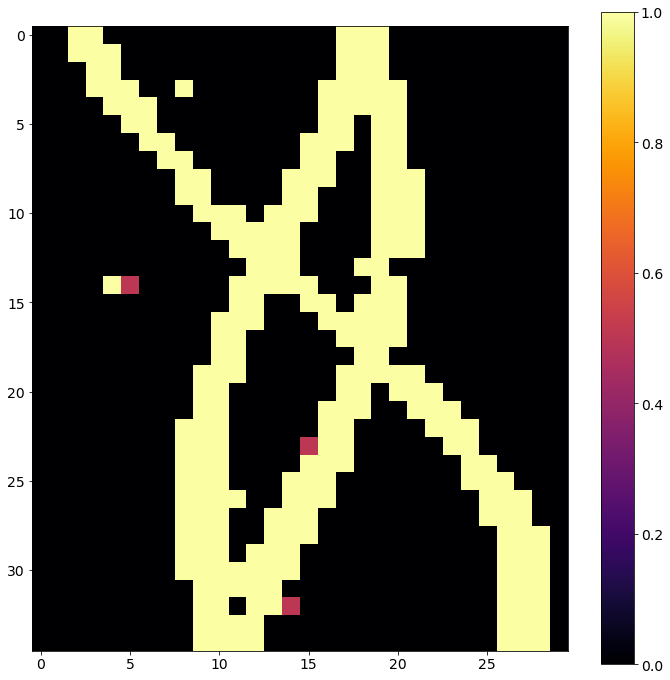

In [6]:
Projection = np.genfromtxt('threeobjectexample.csv',delimiter=',')
print(Projection) #check the values
Ntheta, Nx = np.shape(Projection)
print(Ntheta, Nx) #check the shape
plt.imshow(Projection, cmap='inferno', clim=(0.0, 1.0)) #see it
plt.colorbar()
plt.show()


## Compute the Backprojection
Now we run a backprojection algorithm.

1. Set up a matrix to store the backprojection. It is 32 x 32.
2. Create variables to store the $\Delta \theta$ and $\Delta x$.
3. Make and array of angles from 0 to 90 degrees.
4. Loop over the translational position.

In [31]:
Backprojection = np.zeros([Ntheta, Nx],dtype=float)
delta_theta = 5.25 #degrees for each rotation
delta_x = 0.5 #cm of translation for each step
theta1=np.arange(0, 90,delta_theta) #angles up to 90 degrees
translation = np.linspace(0, Nx*delta_x, Nx)

for xindex in range(Ntheta): #why not use the Projection array to get sizes?
    for yindex in range(Nx):
        for n in range(Ntheta//2):
            for projectionindex in range (Nx):
                s = projectionindex-Nx/2#15.5 #why 15.5???
                d = (yindex-Nx/2) * math.cos(n*delta_theta*math.pi/180) - s - math.sin(n*delta_theta*math.pi/180) * (xindex-Ntheta/2)
                if abs(d) < 0.5:
                    Backprojection[xindex, yindex] = Backprojection[xindex, yindex] + Projection[n, projectionindex]
                if abs(d) >= 0.5 and abs(d) < 1:
                    Backprojection[xindex, yindex] = Backprojection[xindex, yindex] + .1 * Projection[n, projectionindex]
                if abs(d) >= 1 and abs(d) < 1.5:
                    Backprojection[xindex, yindex] = Backprojection[xindex, yindex] - .5 * Projection[n, projectionindex]
                if abs(d) > 1.5 and abs(d) < 2:
                    Backprojection[xindex, yindex] = Backprojection[xindex, yindex] - .4 * Projection[n, projectionindex]
        for n in range(Ntheta//2, Ntheta):
            for projectionindex in range (Nx):
                s = projectionindex-Nx/2#-15.5
                dd = -(yindex-Nx/2) * math.cos(n*delta_theta*math.pi/180) + s + math.sin(n*delta_theta*math.pi/180) * (xindex-Ntheta/2)
                if abs(dd) < 0.5:
                    Backprojection[xindex, yindex] = Backprojection[xindex, yindex] + Projection[n, projectionindex]
                if abs(dd) >= 0.5 and abs(dd) < 1:
                    Backprojection[xindex, yindex] = Backprojection[xindex, yindex] + .1 * Projection[n, projectionindex]
                if abs(dd) >= 1 and abs(dd) < 1.5:
                    Backprojection[xindex, yindex] = Backprojection[xindex, yindex] - .5 * Projection[n, projectionindex]
                if abs(dd) > 1.5 and abs(dd) < 2:
                    Backprojection[xindex, yindex] = Backprojection[xindex, yindex] - .4 * Projection[n, projectionindex]

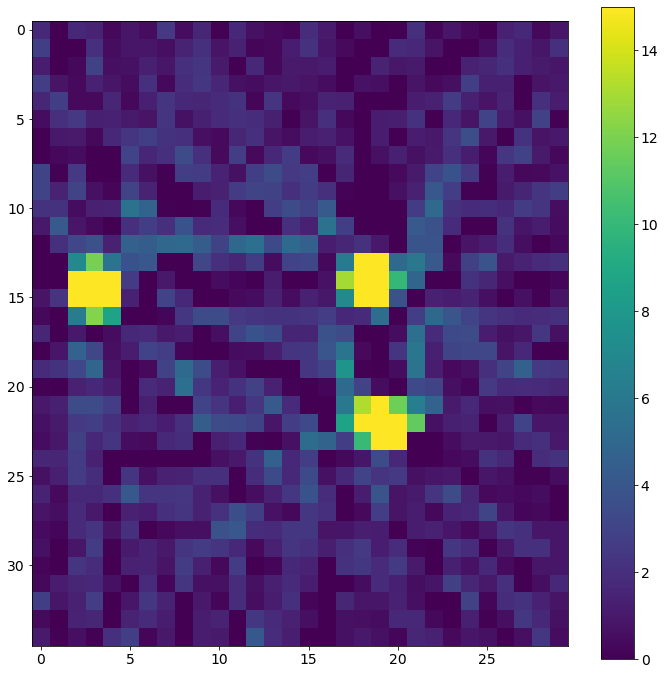

In [32]:
#print(Backprojection)
plt.imshow(Backprojection, clim=(0.0, 15.0)) #see it
plt.colorbar()
plt.show()